# Lab 9

## Seaborn: Statistical Graphics in Python

So far we've learned how to create high quality charts with `matplotlib`. Using the object oriented API we can customize aspects of our plots and create anything. However, in statistics and data science there are some types of charts that we always make, and for those there's `seaborn`.

`seaborn` is a statistical plotting package built on top of `mmatplotlib` which incorporates `pandas` in its design. Like `matplotlib`, `seaborn` has an [example gallery](https://seaborn.pydata.org/examples/index.html) with many great charts and the code to make them. The structure of this lab is based on the [`seaborn` tutorial in the documentation](https://seaborn.pydata.org/tutorial.html)

First, we need data. We'll be using data from a [Fivethirtyeight article on the political leanings of NFL fans](https://fivethirtyeight.com/features/how-every-nfl-teams-fans-lean-politically/) that you can find on [Github](https://github.com/fivethirtyeight/data/blob/master/nfl-fandom/NFL_fandom_data-surveymonkey.csv). I've renamed the files and put them under the `data` directory.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

The dataset in `data/fivethirtyeight-nfl-google.csv` has aggregated search interest data for various sports leagues in each market, as well as Trump's share of the vote in that market.

In [2]:
# load the data
nfl_trends = pd.read_csv("data/fivethirtyeight-nfl-google.csv", header=1)
nfl_trends.head()

,DMA,NFL,NBA,MLB,NHL,NASCAR,CBB,CFB,Trump 2016 Vote%
0,Abilene-Sweetwater TX,45%,21%,14%,2%,4%,3%,11%,79.13%
1,Albany GA,32%,30%,9%,1%,8%,3%,17%,59.12%
2,Albany-Schenectady-Troy NY,40%,20%,20%,8%,6%,3%,4%,44.11%
3,Albuquerque-Santa Fe NM,53%,21%,11%,3%,3%,4%,6%,39.58%
4,Alexandria LA,42%,28%,9%,1%,5%,3%,12%,69.64%


In [3]:
# convert percent strings into floats
numeric_data = (nfl_trends.iloc[:,1:]
                .replace("%", "",regex=True)
                .astype(float))
numeric_data["DMA"] = nfl_trends["DMA"]
nfl_trends = numeric_data

As soon as we `import seaborn`, we notice a change.

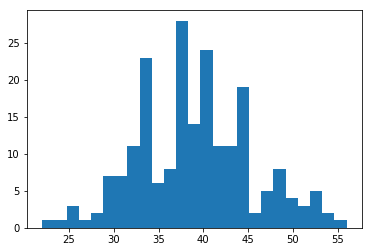

In [4]:
plt.hist(nfl_trends["NFL"], bins=25);

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


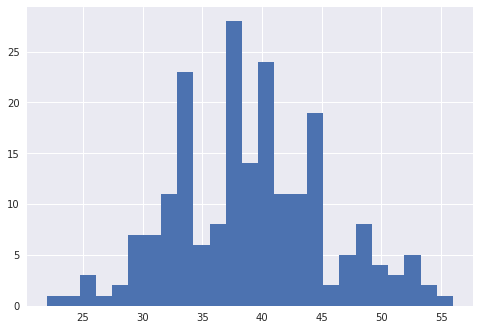

In [5]:
import seaborn as sns
plt.hist(nfl_trends["NFL"], bins=25);

Seaborn has several default styles that we can set with a context

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


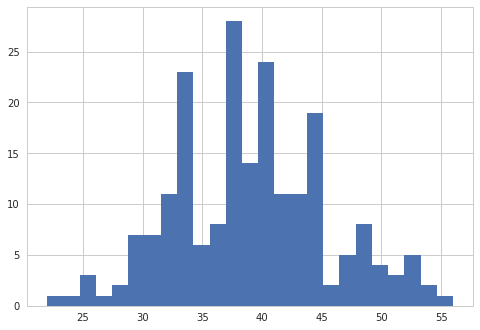

In [6]:
with sns.axes_style("whitegrid"):
    plt.hist(nfl_trends["NFL"], bins=25);

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


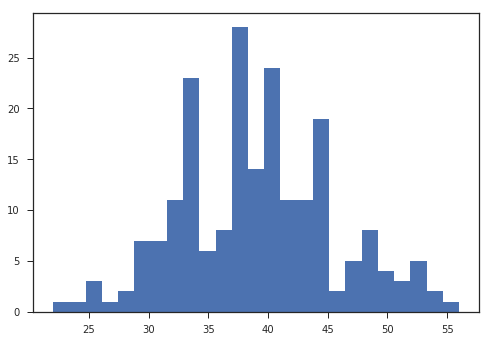

In [7]:
with sns.axes_style("ticks"):
    plt.hist(nfl_trends["NFL"], bins=25);

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


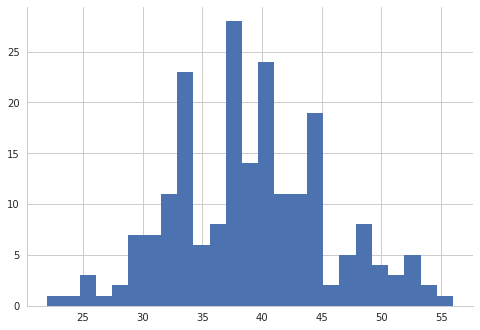

In [8]:
with sns.axes_style("whitegrid"):
    plt.hist(nfl_trends["NFL"], bins=25)
    sns.despine()

We can set the style for the whole session as well.

In [9]:
sns.set_style("whitegrid")

### Plotting Distributions

#### Univariate Distributions
How does search interest in the NFL vary across markets? To explore this we want to see the **distribution** of NFL interest in our dataset. In `matplotlib` we can do this with the histogram above. `seaborn` builds off of the histograms in `matplotlib` and adds more ways to visualize the distribution with the `displot` function.

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


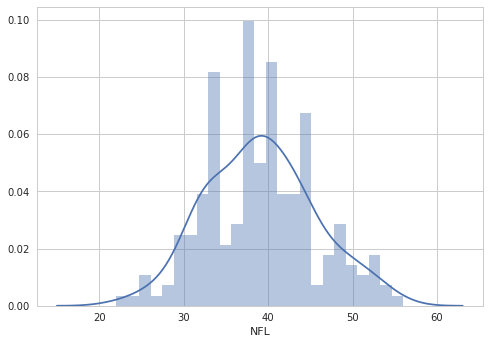

In [10]:
sns.distplot(nfl_trends["NFL"], bins=25);

We can incorporate `seaborn` plotting functions into the object oriented `matplotlib` api.

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


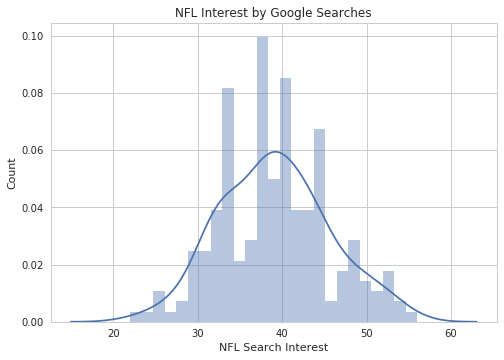

In [11]:
fig, ax = plt.subplots(1, 1)
ax = sns.distplot(nfl_trends["NFL"], bins=25, ax=ax);
ax.set_title("NFL Interest by Google Searches")
ax.set_xlabel("NFL Search Interest")
ax.set_ylabel("Count")

`distplot` has many options, and I encourage you to [read the documentation](https://seaborn.pydata.org/generated/seaborn.distplot.html) to see all of them. 

For instance, we can just plot the kernel density estimate:

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


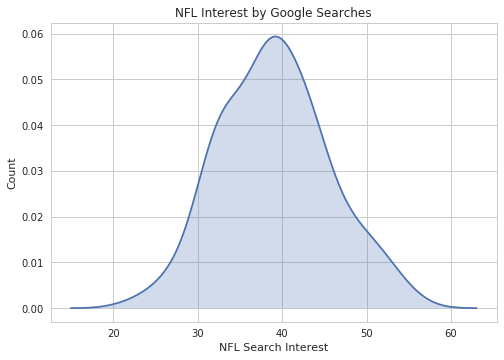

In [12]:
ax = sns.distplot(nfl_trends["NFL"], hist=False, kde_kws={"shade":True});
ax.set_title("NFL Interest by Google Searches")
ax.set_xlabel("NFL Search Interest")
ax.set_ylabel("Count")

Or plot the kernel density estimate with ticks for each data point:

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


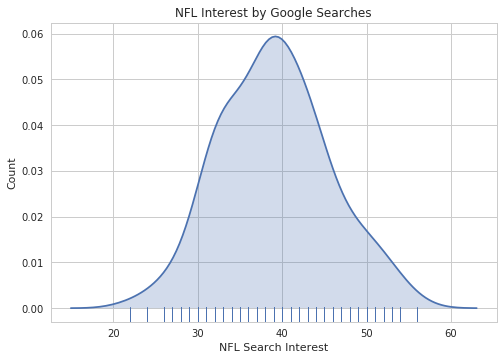

In [13]:
ax = sns.distplot(nfl_trends["NFL"], hist=False, 
                  rug=True, kde_kws={"shade":True});
ax.set_title("NFL Interest by Google Searches")
ax.set_xlabel("NFL Search Interest")
ax.set_ylabel("Count")

Notice that we passed in a dictionary called `kde_kws`. `seaborn` also has individual functions to plot a kernel density estimate or a rug plot, which the higher level `distplot` function uses. In general, to pass arguments into these lower level functions, you'll need to pass in a dictionary of arguments for those functions.

#### Bivariate Distributions

A few weeks ago, Donald Trump picked a fight with NFL players kneeling during the national anthem to protest police brutality and racial inequality. Is support for the NFL polarized across party lines? We can use Google search interest in the NFL to examine this relationship.

The most straightforward way to plot a bivariate distribution is a simple scatterplot.

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


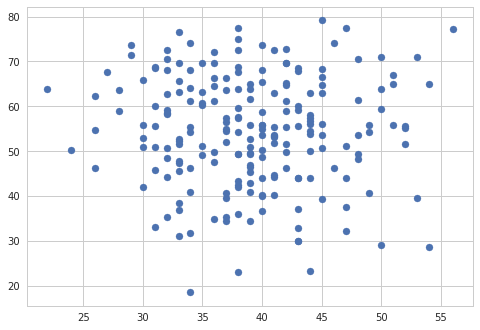

In [14]:
plt.scatter(nfl_trends["NFL"], nfl_trends["Trump 2016 Vote%"]);

If we want more information on our plot, the `jointplot` function in `seaborn` has various ways to visualize a bivariate distribution. Instead of just taking in a `numpy` array or a `pandas` Series object, this function (and most `seaborn` functions) take in full `pandas` DataFrames. We can then select what variables to plot in the function. If you use `ggplot2` in R, this style should seem somewhat familiar.

We can make this scatterplot along with the marginal histograms with `jointplot`.

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


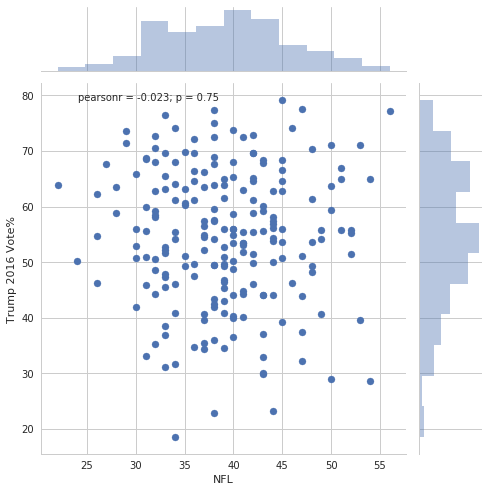

In [15]:
sns.jointplot(data=nfl_trends, x="NFL", y="Trump 2016 Vote%", 
              size=7);

Again, there are all sorts of options we can add.

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


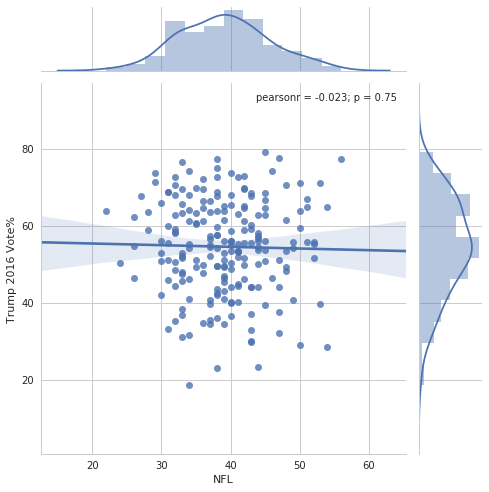

In [16]:
sns.jointplot(data=nfl_trends, x="NFL", y="Trump 2016 Vote%", 
              kind="reg", size=7);

This plot lets us both visualize the distribution and see a summary statistic and it's $p$-value (question: what does this $p$-value mean?). With all this information, it looks like there isn't much of a relationship between interest in the NFL and support for Trump in 2016. This is evidence that the NFL is broadly popular among all Americans, and isn't polarized.

We can also look at a kernel density estimate of the distribution.

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


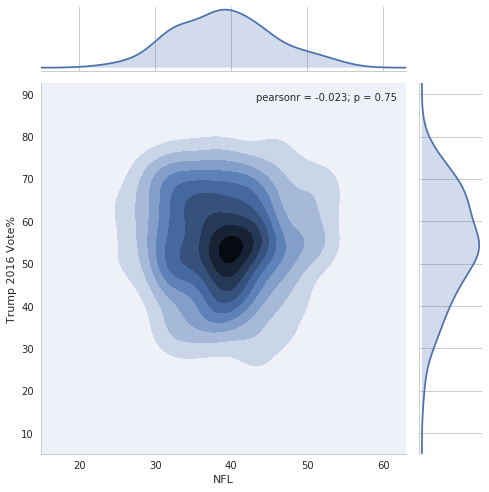

In [17]:
sns.jointplot(data=nfl_trends, x="NFL", y="Trump 2016 Vote%", 
              kind="kde", size=7);

Note that it's possible to grab the output of the function as a [`JointGrid` object](https://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid) and customize it further.

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


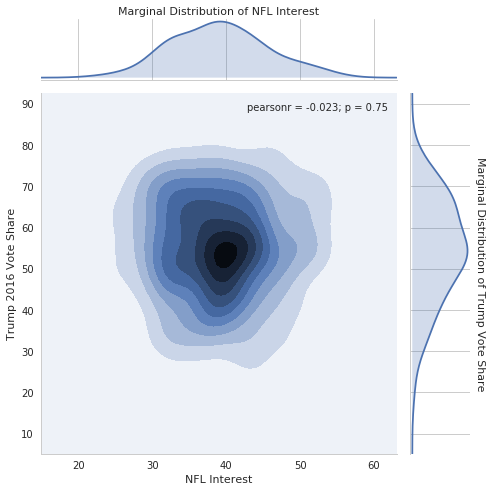

In [18]:
# make plot
g = sns.jointplot(data=nfl_trends, x="NFL", y="Trump 2016 Vote%", 
              kind="kde", size=7);

# change x/y labels on the two axes that hold the marginal distriubtions
g.set_axis_labels("NFL Interest", "Trump 2016 Vote Share")
g.ax_marg_x.set_xlabel("Marginal Distribution of NFL Interest")
g.ax_marg_x.xaxis.set_label_position("top")

g.ax_marg_y.set_ylabel("Marginal Distribution of Trump Vote Share",
                      rotation=270, labelpad=15)
g.ax_marg_y.yaxis.set_label_position("right")
plt.tight_layout()

Finally, we can look at the pairwise distributions of all variables together.

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


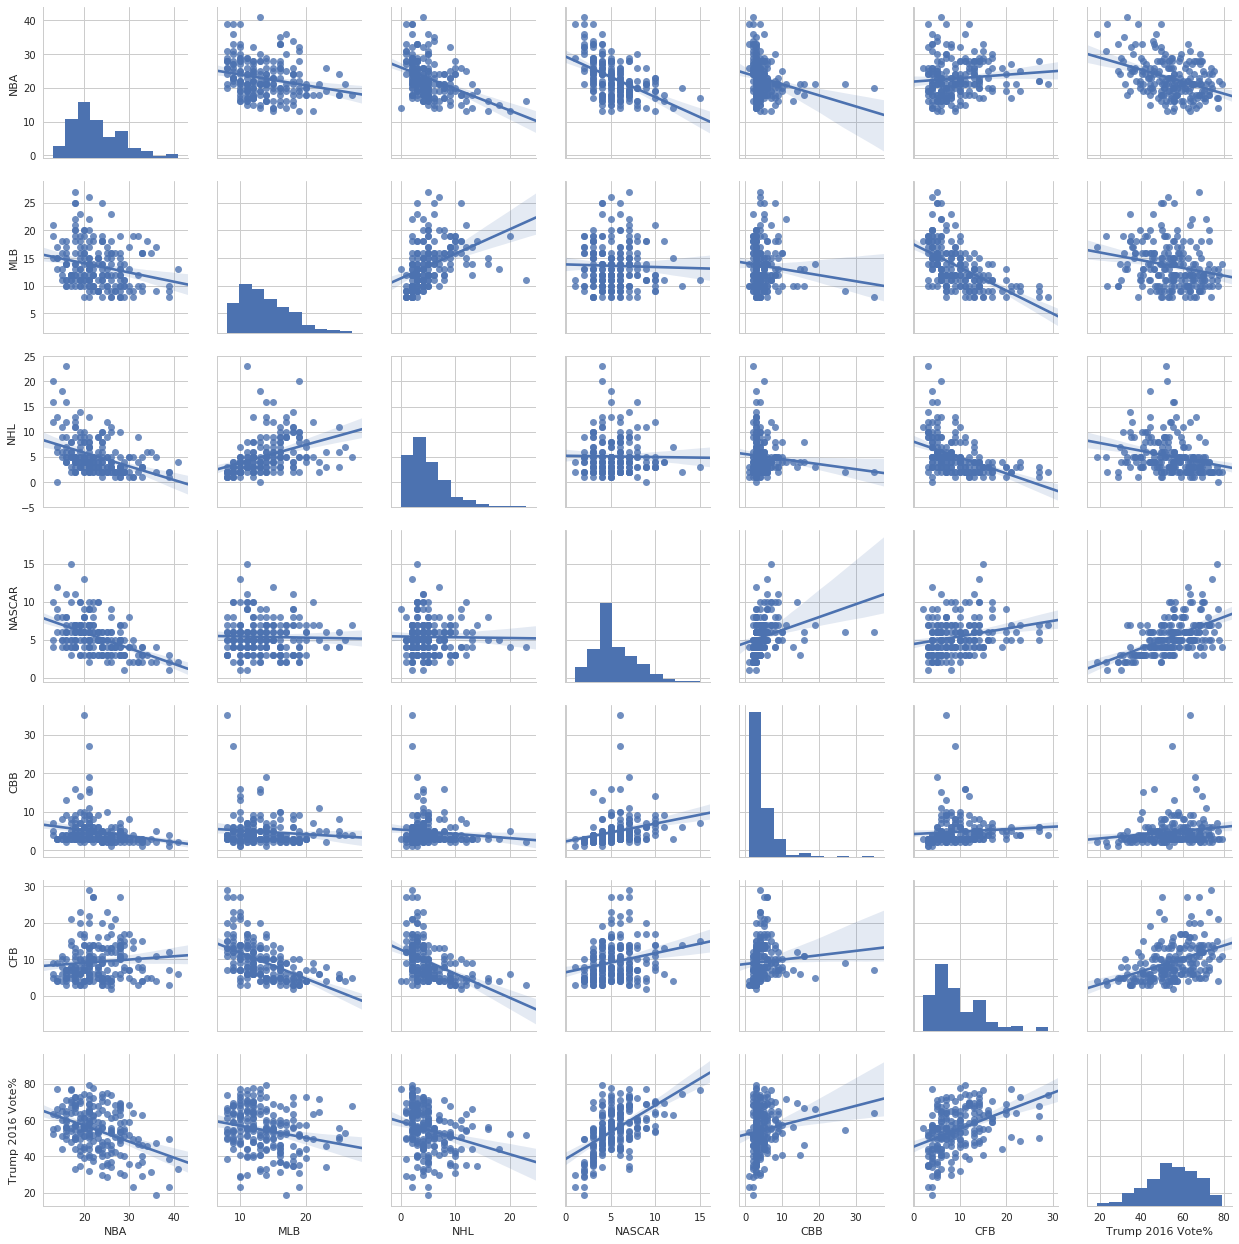

In [19]:
sns.pairplot(nfl_trends.iloc[:,1:], kind="reg");

### Plotting Categorical Data
We've looked at the distribution of NFL interest across markets. It's interesting to see if the distributions for the the other sports leagues are different. We could make a separate plot for each league, but `seaborn` gives us the tools to put all the distributions on one plot.

To do this, we need to convert our data from a "wide" format where every league has its own column, to a "long" format where there are only 3 columns. The `melt` function in `pandas` provides a utility to convert to a long format.

In [20]:
nfl_melted = nfl_trends.melt("DMA")
nfl_melted.head()

,DMA,variable,value
0,Abilene-Sweetwater TX,NFL,45.0
1,Albany GA,NFL,32.0
2,Albany-Schenectady-Troy NY,NFL,40.0
3,Albuquerque-Santa Fe NM,NFL,53.0
4,Alexandria LA,NFL,42.0


With our data in a long format we can evaluate the difference in the distributions. A classic plot to compare distributions is a box plot

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


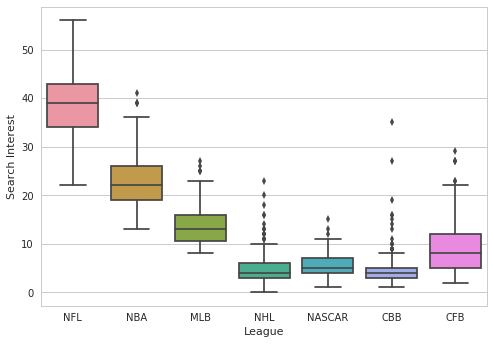

In [21]:
# get rid of trump vote share to only have data on leagues
no_trump = nfl_melted[~nfl_melted["variable"].str.contains("Trump")]
sns.boxplot(data=no_trump, x="variable", y="value")
plt.xlabel("League")
plt.ylabel("Search Interest");

A more modern plot is a "Violin" plot, which embeds a boxplot in a kernel density estimate plot.

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


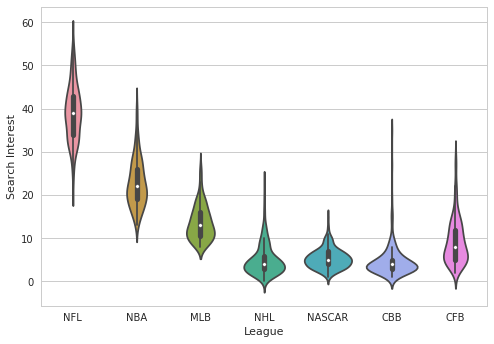

In [22]:
sns.violinplot(data=no_trump, x="variable", y="value")
plt.xlabel("League")
plt.ylabel("Search Interest");

We can also compare the distribution for each league in states where Trump did and did not win a majority.

In [23]:
nfl_trends["Majority Trump"] = nfl_trends["Trump 2016 Vote%"] > 50
nfl_melted = nfl_trends.melt(["DMA", "Majority Trump"])
nfl_melted.head()

,DMA,Majority Trump,variable,value
0,Abilene-Sweetwater TX,True,NFL,45.0
1,Albany GA,True,NFL,32.0
2,Albany-Schenectady-Troy NY,False,NFL,40.0
3,Albuquerque-Santa Fe NM,False,NFL,53.0
4,Alexandria LA,True,NFL,42.0


/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


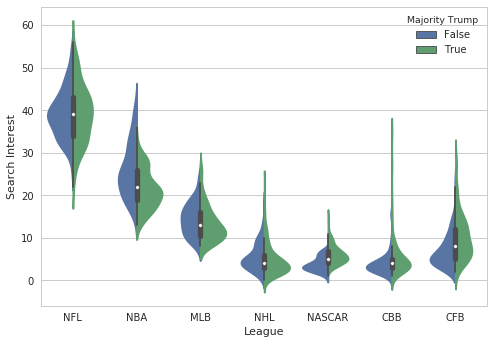

In [24]:
no_trump = nfl_melted[~nfl_melted["variable"].str.contains("Trump")]
sns.violinplot(data=no_trump, x="variable", y="value", 
               hue="Majority Trump", split=True)
plt.xlabel("League")
plt.ylabel("Search Interest");

There are many more types of categorical plots you can make. A great resource is the [tutorial in the documentation](https://seaborn.pydata.org/tutorial/categorical.html).

For exercises we'll be using a different dataset, also from the same article. `data/fiverthirtyeight-nfl-fan.csv` contains information on the number of fans who identify as as Republicans, Democrats, or Independents by race. We'll just look at the aggregate numbers which show the percentage of Republicans, Democrats, and Independents, as well as the percentage of responders who identify as white and non-white.

In [25]:
all_fans = pd.read_csv("data/fivethirtyeight-nfl-fan.csv", header=1)
# only keep aggregates
small_fans = all_fans[["Team","GOP%", "Dem%", "Ind%", "White%", "Nonwhite%"]]

# convert percent strings into floats
numeric_data = (small_fans.iloc[:,1:]
                .replace("%", "",regex=True)
                .astype(float))
numeric_data["Team"] = small_fans["Team"]
small_fans = numeric_data
small_fans.head()

,GOP%,Dem%,Ind%,White%,Nonwhite%,Team
0,26.0,26.0,48.0,68.0,32.0,Arizona Cardinals
1,29.0,31.0,40.0,57.0,43.0,Atlanta Falcons
2,19.0,37.0,43.0,68.0,32.0,Baltimore Ravens
3,26.0,24.0,50.0,67.0,33.0,Buffalo Bills
4,30.0,31.0,39.0,70.0,30.0,Carolina Panthers


Exercise: Create box plots which show the distribution of GOP, Dem, and Indep support across the teams. The box plots should all be on the same figure

In [26]:
### Your code here

Exercise: Make the same plot with each distribution split between teams where greater than 75% of respondents identify as white and where less than 75% of respondents identify as white

In [27]:
### Your code here

### Fitting and plotting functions

`seaborn` also provides functions to plot and fit relationships which generalize scatter plots in `matplotlib`.

The `lmplot` function will plot a scatter plot of the data and fit and visualize a linear model on top of it. Let's look again at the relationship between NFL interest and Trump support.

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


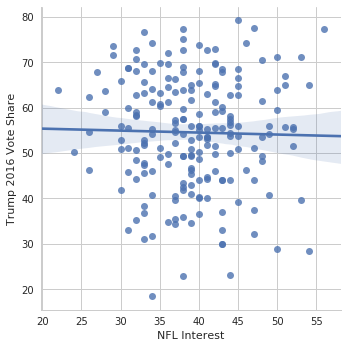

In [28]:
g = sns.lmplot(data=nfl_trends, x="NFL", y="Trump 2016 Vote%")
g.set_axis_labels("NFL Interest", "Trump 2016 Vote Share");

And for NASCAR

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


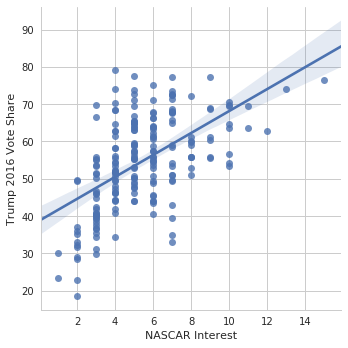

In [29]:
g = sns.lmplot(data=nfl_trends, x="NASCAR", y="Trump 2016 Vote%")
g.set_axis_labels("NASCAR Interest", "Trump 2016 Vote Share");

We can also hit higher order models and non-parametric models such as LOWESS

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


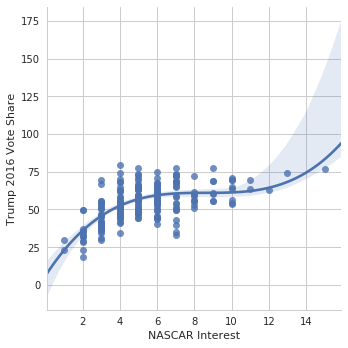

In [30]:
g = sns.lmplot(data=nfl_trends, x="NASCAR", y="Trump 2016 Vote%",
              order=3)
g.set_axis_labels("NASCAR Interest", "Trump 2016 Vote Share");

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


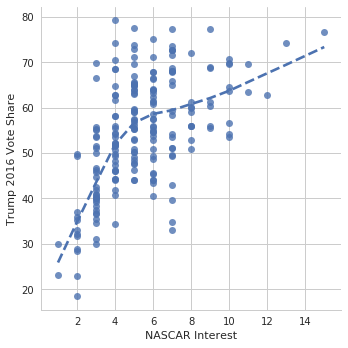

In [31]:
g = sns.lmplot(data=nfl_trends, x="NASCAR", y="Trump 2016 Vote%",
              lowess=True, line_kws={'linestyle':"--"})
g.set_axis_labels("NASCAR Interest", "Trump 2016 Vote Share");

With `residplot` we can plot the residuals and evaluate the fit.

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


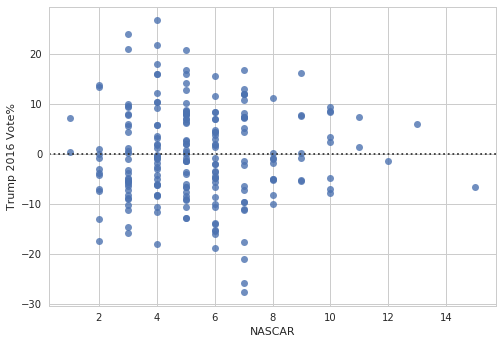

In [32]:
ax = sns.residplot(data=nfl_trends, x="NASCAR", y="Trump 2016 Vote%",
              order=3)

We can also fit a logistic regression. Note that it's more computational expensive than fitting a linear regression.

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


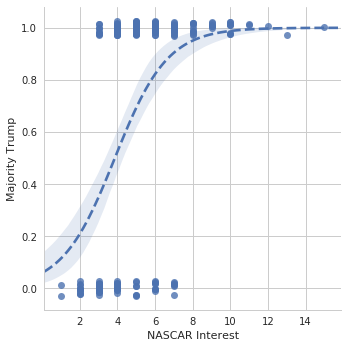

In [33]:
g = sns.lmplot(data=nfl_trends, x="NASCAR", y="Majority Trump",
              logistic=True, line_kws={'linestyle':"--"}, y_jitter=0.03)
g.set_axis_labels("NASCAR Interest", "Majority Trump");

So we see that there's evidence that NASCAR interest is related to Trump support (why does that make sense?), and there isn't evidence that NFL interest is related to Trump support. We can look at all the leagues simultaneously.

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


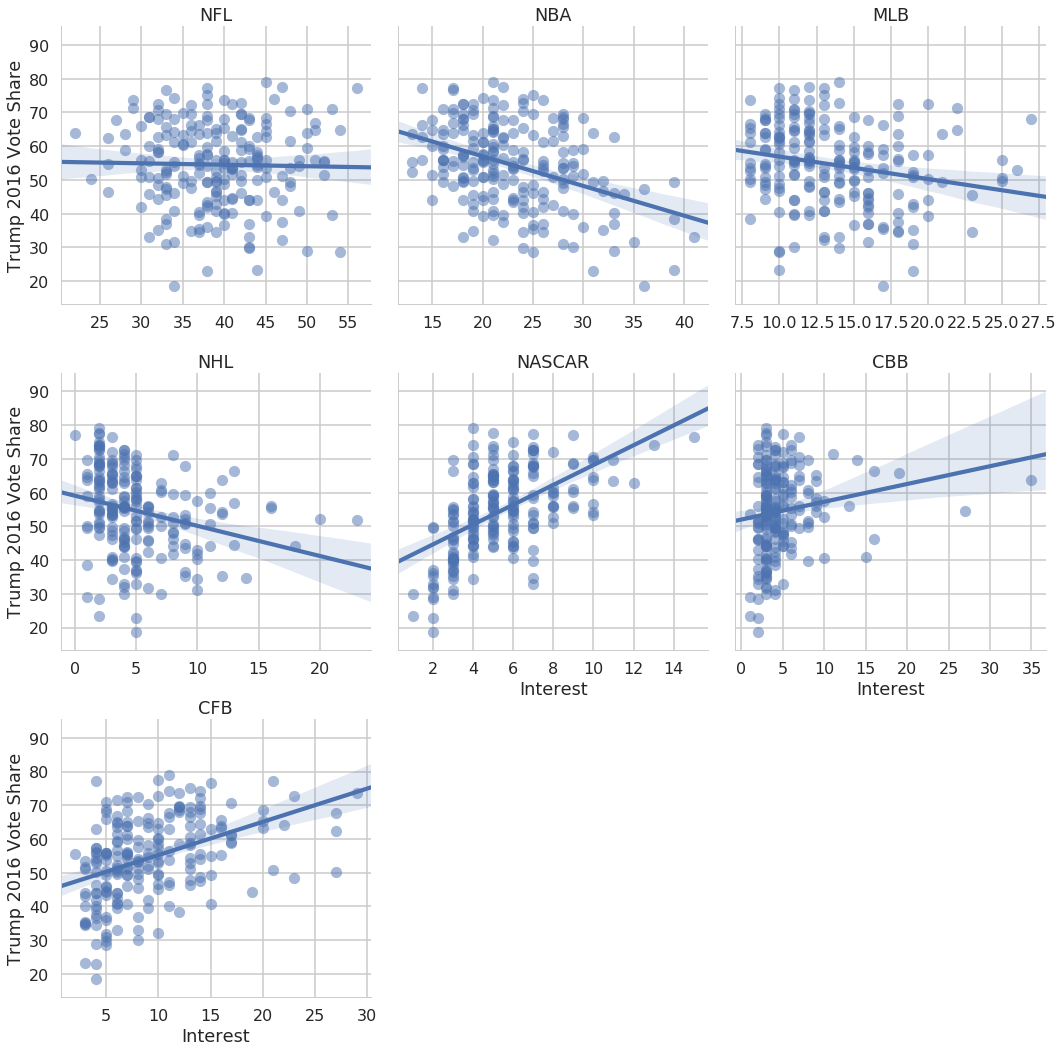

In [34]:
nfl_melted = nfl_trends.melt(["DMA", "Majority Trump", "Trump 2016 Vote%"])
with sns.plotting_context("poster"):
    g = sns.lmplot(data=nfl_melted, x="value", y="Trump 2016 Vote%", 
                  col="variable", col_wrap=3, scatter_kws={"alpha":.5},
                  sharex=False)
    g.set_axis_labels("Interest", "Trump 2016 Vote Share")
    g.set_titles("{col_name}");

Exercise: Using the NFL fan identification data, create a scatter plot of percent identifying as Republicans vs percent identifying as non-white

In [35]:
### Your code here

Exercise: Now create the same plot where the dependent variable changes from GOP to Dem to Independent

In [36]:
### Your code here

### Faceting arbitrary plots

With `seaborn` we can created faceted plots out of any plot with the `FacetGrid` object. Many of the objects that the functions we've been using return are of type `FacetGrid`. It creates a plot where the columns and rows are defined as "facets" of the data.

In [37]:
nfl_melted.head()

,DMA,Majority Trump,Trump 2016 Vote%,variable,value
0,Abilene-Sweetwater TX,True,79.13,NFL,45.0
1,Albany GA,True,59.12,NFL,32.0
2,Albany-Schenectady-Troy NY,False,44.11,NFL,40.0
3,Albuquerque-Santa Fe NM,False,39.58,NFL,53.0
4,Alexandria LA,True,69.64,NFL,42.0


/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


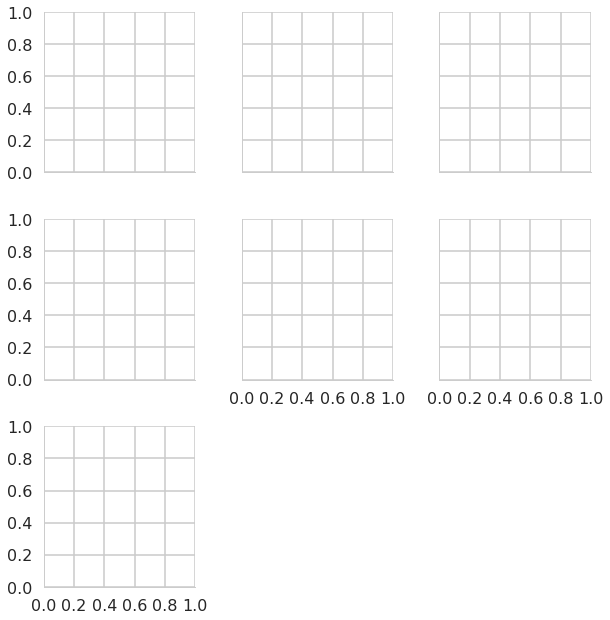

In [38]:
with sns.plotting_context("poster"):
    g = sns.FacetGrid(data=nfl_melted, col="variable", col_wrap=3)

Now we can create a plot on each facet by mapping the plot function across each facet.

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


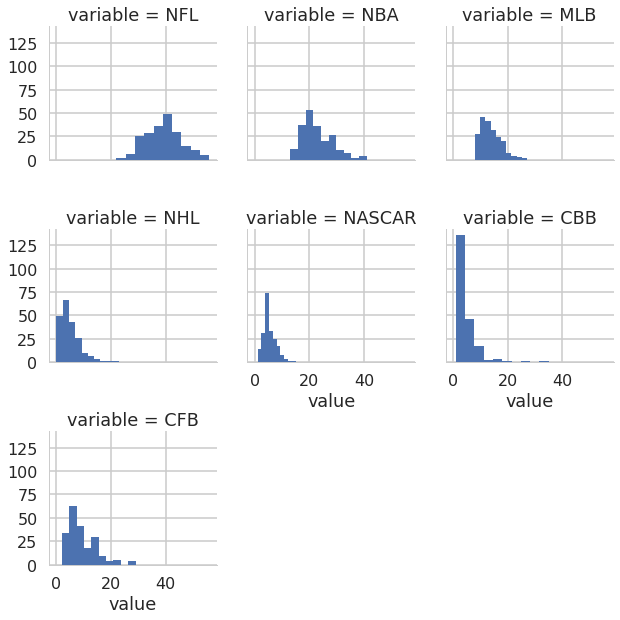

In [39]:
with sns.plotting_context("poster"):
    g = sns.FacetGrid(data=nfl_melted, col="variable", col_wrap=3)
    g.map(plt.hist, "value")

We can provide any of the arguments that seaborn uses (e.g. `hue`) to the `FacetGrid` initialization, and add arguments for the plot when we map the plotting function.

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


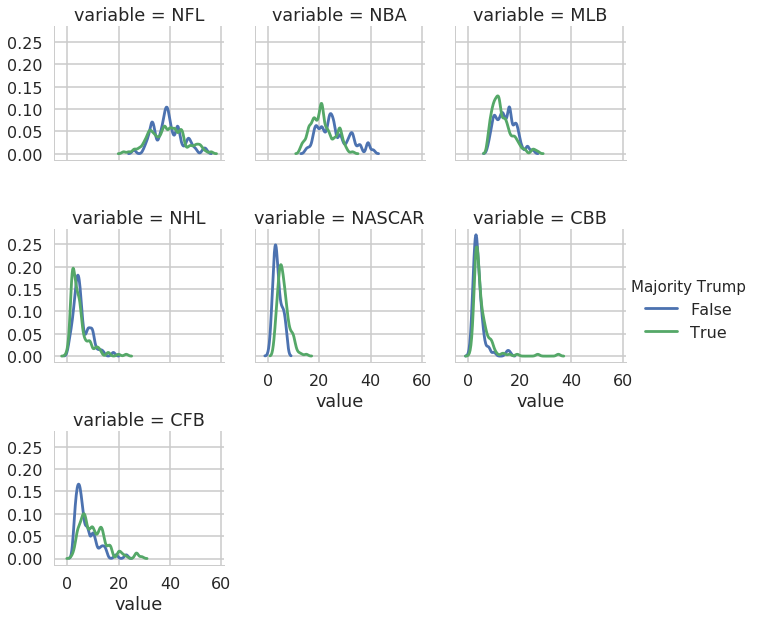

In [40]:
with sns.plotting_context("poster"):
    g = sns.FacetGrid(data=nfl_melted, col="variable", col_wrap=3, 
                      hue="Majority Trump")
    g.map(sns.distplot, "value", hist=False, kde_kws={"bw":.7})
    g.add_legend()

We can change each plot's title, the name of the x and y axes, etc.

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


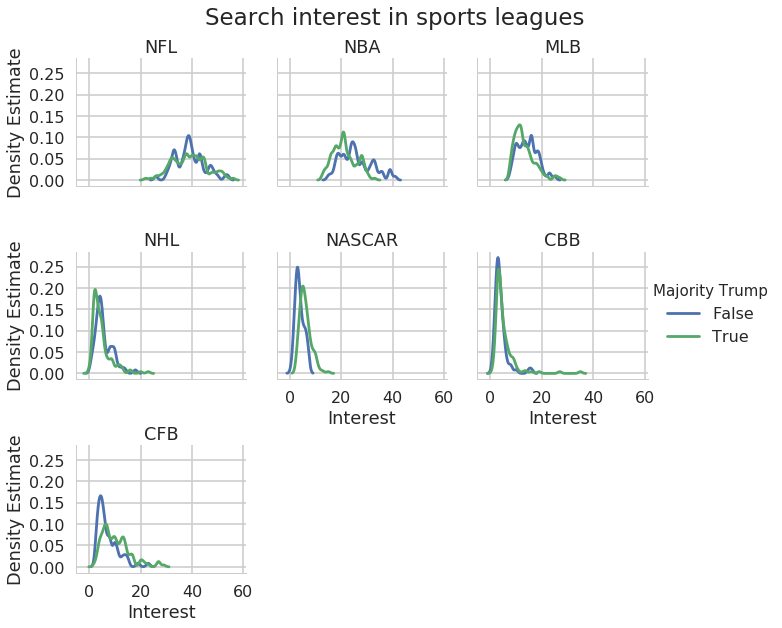

In [41]:
with sns.plotting_context("poster"):
    g = sns.FacetGrid(data=nfl_melted, col="variable", col_wrap=3, 
                      hue="Majority Trump")
    g.map(sns.distplot, "value", hist=False, kde_kws={"bw":.7})
    g.add_legend()
    g.set_axis_labels("Interest", "Density Estimate")
    g.set_titles("{col_name}")
    g.fig.subplots_adjust(top=0.9)
    plt.suptitle("Search interest in sports leagues");

Exercise: Using the NFL fan identification data, create a plot with kernel density plots of the distribution of GOP, Dem, and Independent support across teams, separating out teams where greater than 75% of fan respondents indentified as white. Facet the rows by party and the columns by greater than 75% white.

In [42]:
### Your code here

## Solutions to Quiz 3

### Problem 1

#### Part A (2 points)
Write a function which centers a matrix, i.e. for a matrix $X \in R^{n\times d}$ with columns $X_1,\ldots, X_d$, each column should have mean zero

In [43]:
def center(X):
    """Center a matrix X"""
    return(X - X.mean(0))

#### Part B (2 points)
Write a function which standardizes a matrix, i.e. for a matrix $X \in R^{n\times d}$ with columns $X_1,\ldots, X_d$, each column should have mean zero and variance 1

In [44]:
def standardize(X):
    """Standardize a matrix X"""
    return((X - X.mean(0)) / X.std(0))

#### Part C (2 points)

Write a function which normalizes a matrix, i.e. for a matrix $X$, with columns $X_1,\ldots, X_d$, define a new matrix $\tilde{X}$ such that for each column $$\tilde{X}_{i} = \frac{X_{i} - min(X_i)}{max(X_i) - min(X_i)}$$

In [45]:
def normalize(X):
    """Standardize a matrix X"""
    return((X - X.min(0)) / (X.max(0) - X.min(0)))

#### Part D (2 points)
Write a functions which takes in a matrix $X$ and normalizes the rows so that each row has unit norm, i.e. project the rows onto the unit sphere

In [46]:
def project(X):
    """Project rows of X onto the unit sphere"""
    return(X / np.linalg.norm(X, axis=1, keepdims=True))

#### Part E (4 points)
Write a function which takes in a vector $X$ and plots a histogram for $X$, the centered version of $X$, the standardized version of $X$ and the normalized version of $X$. Be sure to use one figure and 4 axes. Also create a title for each subplot and one title for the whole plot. You may find the function `plt.tight_layout()` to be useful here.

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


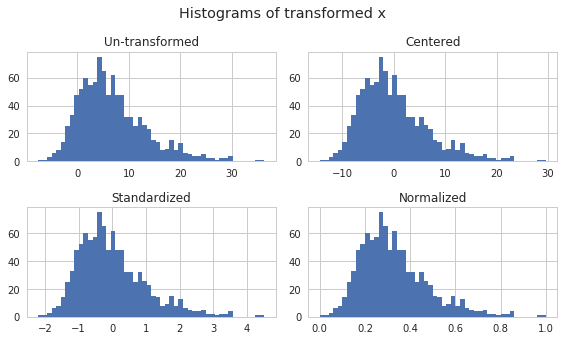

In [47]:
def plot_transforms(x):
    """Plot histogram of x and transformations"""
    # get figure and axes
    fig, axes = plt.subplots(2, 2, figsize=(8,9/2))
    
    # first histogram
    axes[0,0].hist(x, bins=50)
    axes[0,0].set_title("Un-transformed")
    
    # centered
    axes[0,1].hist(center(x), bins=50)
    axes[0,1].set_title("Centered")
    
    # standardized
    axes[1,0].hist(standardize(x), bins=50)
    axes[1,0].set_title("Standardized")  
    
    # normalized
    axes[1,1].hist(normalize(x), bins=50)
    axes[1,1].set_title("Normalized")
    
    # sup title
    fig.suptitle("Histograms of transformed x", y=1.05)
    
    plt.tight_layout()
    return(fig, axes)

np.random.seed(1234)
x = np.random.gumbel(4, 5, 1000)
plot_transforms(x);

Exercise: Make this same plot using `FacetGrid` in `seaborn`

In [48]:
x = np.random.gumbel(4, 5, 1000)
x = pd.DataFrame(x)
x.columns = ["Un-transformed"]
x["Centered"] = center(x["Un-transformed"])
x["Standardized"] = standardize(x["Un-transformed"])
x["Normalized"] = normalize(x["Un-transformed"])
x["id"] = x.index
x.head()

,Un-transformed,Centered,Standardized,Normalized,id
0,7.340602,-0.060823,-0.009010,0.244636,0
1,-0.906788,-8.308213,-1.230694,0.083268,1
2,5.612750,-1.788675,-0.264956,0.210829,2
3,1.470330,-5.931094,-0.878572,0.129779,3
4,0.207334,-7.194091,-1.065660,0.105067,4


In [49]:
### Your code here

#### Part F (3 points)
Write a function which takes in a 2 dimensional matrix X, makes a scatter plot of the rows, and makes a scatter plot of the rows projected onto the unit circle. Be sure to only create one figure and 2 subplots. Include a title for each subplot and a title for the whole plot. Again, the function `plt.tight_layout()` may be useful here.

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


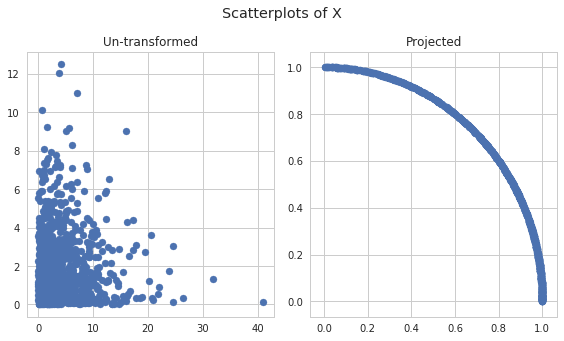

In [50]:
def plot_project(X):
    """Plot a scatter plot of X and of the rows projected on to the circle"""
    
    ### BEGIN SOLUTION
    # get figure and axes
    fig, axes = plt.subplots(1, 2, figsize=(8,9/2))
    
    # regular
    axes[0].scatter(X[:, 0], X[:, 1])
    axes[0].set_title("Un-transformed")
    
    # centered
    X_proj = project(X)
    axes[1].scatter(X_proj[:, 0], X_proj[:, 1])
    axes[1].set_title("Projected")

    
    # sup title
    fig.suptitle("Scatterplots of X", y=1.05)
    
    plt.tight_layout()
    return(fig, axes)
    
    ### END SOLUTION

np.random.seed(1234)
x1 = np.random.exponential(4, 1000)
x2 = np.random.chisquare(2, 1000)
X = np.vstack([x1, x2]).T
plot_project(X);

### Problem 2

#### Part A (5 points)
Write a function which takes in an $n \times d$ matrix of features $X$, and an $n$ dimensional vector of outputs $y$, and returns the OLS estimate:

$$\hat{\beta} = (X^TX)^{-1}X^Ty$$

Note: Use pure numpy, not a package that computes the OLS for you. The goal here is to perform the linear algebra operations **in numpy**

In [51]:
def compute_ols(X, y):
    """Computes the OLS estimate of y regressed on X"""
    return(np.linalg.inv( X.T @ X) @ X.T @ y)

#### Part B (5 points)
Write a function which takes in an $n \times 2$ matrix of features $X$ (a column of 1s and the univariate covariate), and an $n$ dimensional vector of outputs $y$, and makes a scatter plot of y on x and plots the line resulting from the least squares estimate. Make sure to label your axes and create a title.

Note: Passing in a matrix with a column of 1s means that the ols estimate will have two parts: the intercept, and the slope. Make sure to incorporate **both** of these when plotting the least squares regression line

/home/ebenmichael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


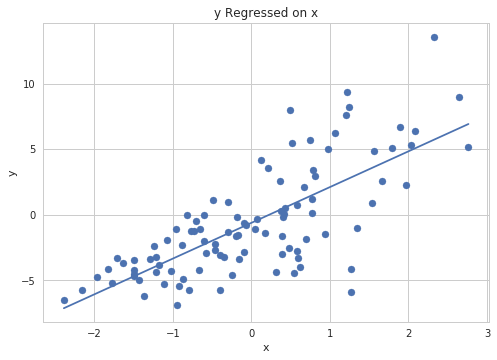

In [52]:
def plot_ols(X, y):
    """Make a scatter plot of y on X"""
    
    ### BEGIN SOLUTION
    # compute ols
    ols = compute_ols(X, y)
    
    # start the scatter plot
    plt.scatter(X[:, 1], y)
    
    # add the regression line
    xmin = X[:, 1].min()
    xmax = X[:, 1].max()
    
    y_hat_min = ols[0] + ols[1] * xmin
    y_hat_max = ols[0] + ols[1] * xmax
    
    plt.plot([xmin, xmax], [y_hat_min, y_hat_max])
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("y Regressed on x")
    ### END SOLUTION

# simulate heterskedastic data
np.random.seed(159)
n = 100
X = np.vstack([np.ones(n), np.random.randn(n)]).T
beta = np.random.laplace(0, 1, 2)
y = X @ beta + np.random.randn(n) * (X[:, 1] - X.min(0)[1])

# plot
plot_ols(X, y)

Exercise: Create this plot using `seaborn`

In [53]:
### Your code here